# DACON



## [문자] 청와대 청원 : 청원의 주제가 무엇일까?
****

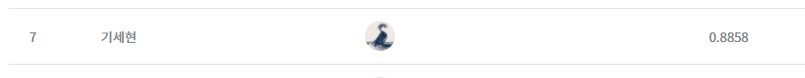

In [1]:
from IPython.display import Image
 
Image("dacon_blue.jpg")

**** 
## 1. Package Import

In [6]:
import pandas as pd
import numpy as np
np.random.seed(456)
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

****
## 2. Data Wrangling

In [ ]:
train_data = pd.read_csv("train.csv").iloc[:, 1:].dropna(how = 'any')
train_data.index = range(len(train_data))
test_data = pd.read_csv("test.csv").iloc[:, 1:]
submission = pd.read_csv("sample_submission.csv")

In [8]:
train_data.shape, test_data.shape

((39992, 2), (5000, 1))

In [9]:
train_data.head()

,category,data
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [10]:
test_data.head()

,data
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 11년간 일하고 혈암과 백혈병 진단을 받은 ...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


****
### Claensing Text

In [11]:
def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus

In [12]:
train_data.data = clean_text(train_data.data)
test_data.data = clean_text(test_data.data)

****

### cleansing string punctuation 

In [13]:
train_data_text = list(train_data['data'])

train_clear_text = []

for i in tqdm(range(len(train_data_text))):
  train_clear_text.append(str(train_data_text[i]).replace('\\n', ''))
train_data['clear_text'] = train_clear_text
train_data.head()

100%|██████████| 39992/39992 [00:00<00:00, 470751.39it/s]


,category,data,clear_text
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...","빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...","티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [14]:
train_clear_text = list(train_data['clear_text'])

train_clear_text2 = []

for text in train_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  train_clear_text2.append(temp)
train_data['clear_text'] = train_clear_text2
train_data.head()

,category,data,clear_text
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 남자 도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...",빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올...
3,1,"티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...",티비 세 세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일...
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타...


In [15]:
test_data_text = list(test_data['data'])

test_clear_text = []

for i in tqdm(range(len(test_data_text))):
  test_clear_text.append(test_data_text[i].replace('\\n', ' '))
test_data['clear_text'] = test_clear_text
test_data.head()

100%|██████████| 5000/5000 [00:00<00:00, 371677.30it/s]


,data,clear_text
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못하...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에 *지역 어린이...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부...","방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


In [16]:
test_clear_text = list(test_data['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  test_clear_text2.append(temp)
test_data['clear_text'] = test_clear_text2
test_data.head()

,data,clear_text
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...,소년법 폐지해주세요 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못하...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...,국공립 유치원 증설에 관하여 국공립 유치원 부지 학보와건립및 증설에 지역 어린이...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요,나경원파면 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...,국민위원에가 삼성편만들어요 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부...",방과후 유치원 어린이집 영어교육을 유지시켜주세요 저는 아이 셋 키우는 평범한 주부...


****

### Using Mecab for tokenizing

In [22]:
from konlpy.tag import Mecab
mecab = Mecab()

In [23]:
stop_df = pd.read_csv('한국어불용어100.txt', sep = '\t', header = None, names = ['형태','품사','비율'])
stop_df.tail()

,형태,품사,비율
95,원,NNB,0.000492
96,잘,MAG,0.000491
97,통하,VV,0.000487
98,소리,NNG,0.000486
99,놓,VX,0.000483


In [24]:
stop_df.loc[100] = '가'
stop_df.loc[101] = '합니다'

In [25]:
stop_words = list(stop_df.형태)

****

### delete outlier data

In [26]:
ind_list = [24885, 14916, 14605, 6641, 17406, 26957, 2175, 6885, 8947, 14966, 8198, 25955, 39167,21707, 12678,
           3023, 31971, 3730, 37153, 33481, 33369, 12927, 30773, 36431,12373,  37525,27530, 8958, 16884, 18072,
           4478, 7940, 16400, 16656]
train_data = train_data.query('index not in @ind_list')
train_data.index = range(0, len(train_data))

****

### get nouns using Mecab

In [27]:
X_train = []

text = list(train_data['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = mecab.nouns(text[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train.append(temp_X)

100%|██████████| 39958/39958 [00:54<00:00, 736.39it/s]


In [28]:
X_test = []

text = list(test_data['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = mecab.nouns(text[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test.append(temp_X)

100%|██████████| 5000/5000 [00:06<00:00, 735.76it/s]


****

## 3. Modeling

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,  ReduceLROnPlateau
from tensorflow.keras.regularizers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, RMSprop

In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [39]:
threshold = 11
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 45144
등장 빈도가 10번 이하인 희귀 단어의 수: 32528
단어 집합에서 희귀 단어의 비율: 72.05387205387206
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.2528904319394


In [40]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 12617


In [41]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_train)
token_X_train = tokenizer.texts_to_sequences(X_train)
token_X_test = tokenizer.texts_to_sequences(X_test)

In [42]:
y_train = to_categorical(np.array(train_data['category']))

In [43]:
drop_train = [index for index, sentence in enumerate(token_X_train) if len(sentence) < 1]

In [44]:
# 빈 샘플들을 제거
del_X_train = np.delete(token_X_train, drop_train, axis=0)
del_y_train = np.delete(y_train, drop_train, axis=0)
print(len(del_X_train))
print(len(del_y_train))

39933
39933


train data의 최대 길이 : 5661
train data의 평균 길이 : 66.6278516515163


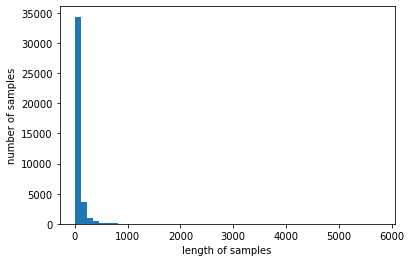

In [45]:
print('train data의 최대 길이 :',max(len(l) for l in del_X_train))
print('train data의 평균 길이 :',sum(map(len, del_X_train))/len(del_X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

test data의 최대 길이 :  3806
test data의 평균 길이 :  66.188


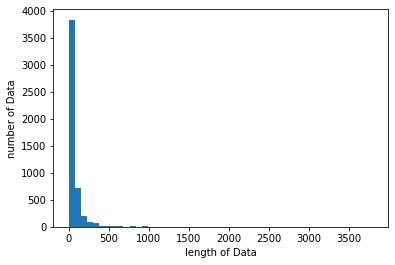

In [46]:
print("test data의 최대 길이 : ", max(len(l) for l in token_X_test))
print("test data의 평균 길이 : ", sum(map(len, token_X_test))/ len(token_X_test))
plt.hist([len(s) for s in token_X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [47]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [48]:
max_len = 300
below_threshold_len(max_len, del_X_train)

전체 샘플 중 길이가 300 이하인 샘플의 비율: 97.22284827085367


In [49]:
pad_X_train = pad_sequences(del_X_train, maxlen = max_len)
pad_X_test = pad_sequences(token_X_test, maxlen = max_len)

### Model 1

In [54]:
model1 = Sequential()
model1.add(Embedding(vocab_size,64, input_length=max_len))
model1.add(Conv1D(64, 5, activation = 'relu', padding = 'same', kernel_regularizer=l2(0.01)))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(3, activation = 'softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 64)           807488    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 64)           20544     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 828,227
Trainable params: 828,227
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer=RMSprop(lr = .0005), loss='categorical_crossentropy', metrics=['acc'])
reLR = ReduceLROnPlateau(patience = 5, verbose=1, factor = .2)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience = 2)
mc = ModelCheckpoint(filepath = '1028_1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True, restore_best_weights = True)

In [56]:
history1 = model1.fit(pad_X_train, del_y_train, epochs=30, batch_size= 64, shuffle = True, validation_split=0.2, verbose = 1, callbacks=[es, mc, reLR])

Epoch 1/30
499/500 [============================>.] - ETA: 0s - loss: 0.2878 - acc: 0.8986
Epoch 00001: val_acc improved from -inf to 0.87893, saving model to 1028_1.h5
500/500 [==============================] - 5s 9ms/step - loss: 0.2878 - acc: 0.8986 - val_loss: 0.3431 - val_acc: 0.8789
Epoch 2/30
498/500 [============================>.] - ETA: 0s - loss: 0.2810 - acc: 0.9024
Epoch 00002: val_acc did not improve from 0.87893
500/500 [==============================] - 4s 8ms/step - loss: 0.2812 - acc: 0.9024 - val_loss: 0.3426 - val_acc: 0.8788
Epoch 3/30
500/500 [==============================] - ETA: 0s - loss: 0.2753 - acc: 0.9053
Epoch 00003: val_acc did not improve from 0.87893
500/500 [==============================] - 4s 8ms/step - loss: 0.2753 - acc: 0.9053 - val_loss: 0.3493 - val_acc: 0.8762
Epoch 00003: early stopping


In [57]:
model1 = load_model('1028_1.h5') # val_acc = 0.87893

In [58]:
pred1 = model1.predict(pad_X_test)

### Model 2

In [61]:
model2 = Sequential()
model2.add(Embedding(vocab_size, 64, input_length = max_len))
model2.add(Conv1D(64, 5, activation = 'relu',kernel_regularizer= l2(0.001)))
model2.add(MaxPooling1D(5))
model2.add(Dropout(.5))
model2.add(Conv1D(64, 5 ,activation = 'relu', kernel_regularizer=  l2(.001)))
model2.add(GlobalMaxPooling1D())
model2.add(BatchNormalization())
model2.add(Dense(3, activation = 'softmax', kernel_regularizer = l2(0.001)))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 64)           807488    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 296, 64)           20544     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 59, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 59, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 55, 64)            20544     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)               

In [62]:
model2.compile(optimizer = RMSprop(lr = .0005), loss = 'categorical_crossentropy', metrics = ['acc'])

callback_ear = [EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min', verbose = 1), ModelCheckpoint(filepath = '1028_2.h5', monitor = 'val_acc', save_best_only = True, mode = 'max',verbose = 1)]
history2 = model2.fit(pad_X_train, del_y_train, epochs = 15, batch_size = 64, verbose = 1, validation_split = .2, callbacks=callback_ear)

Epoch 1/15
500/500 [==============================] - ETA: 0s - loss: 0.6927 - acc: 0.7538
Epoch 00001: val_acc improved from -inf to 0.86127, saving model to 1028_2.h5
500/500 [==============================] - 6s 12ms/step - loss: 0.6927 - acc: 0.7538 - val_loss: 0.5463 - val_acc: 0.8613
Epoch 2/15
497/500 [============================>.] - ETA: 0s - loss: 0.4334 - acc: 0.8739
Epoch 00002: val_acc improved from 0.86127 to 0.87993, saving model to 1028_2.h5
500/500 [==============================] - 5s 10ms/step - loss: 0.4331 - acc: 0.8740 - val_loss: 0.4081 - val_acc: 0.8799
Epoch 3/15
500/500 [==============================] - ETA: 0s - loss: 0.3735 - acc: 0.8886
Epoch 00003: val_acc did not improve from 0.87993
500/500 [==============================] - 5s 11ms/step - loss: 0.3735 - acc: 0.8886 - val_loss: 0.3893 - val_acc: 0.8789
Epoch 4/15
494/500 [============================>.] - ETA: 0s - loss: 0.3324 - acc: 0.8992
Epoch 00004: val_acc improved from 0.87993 to 0.88406, saving

In [63]:
model2 = load_model('1028_2.h5') # val_acc = 0.8841

In [64]:
pred2 = model2.predict(pad_X_test)

### Model 3

In [65]:
model3 = Sequential()
model3.add(Embedding(vocab_size, 64, input_length = max_len))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(MaxPooling1D(pool_size=4))
model3.add(LSTM(16))
model3.add(Dropout(0.4))
model3.add(Dense(3, activation='softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 64)           807488    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 296, 32)           10272     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 292, 32)           5152      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 288, 32)           5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 72, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 16)                3136      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)               

In [66]:
model3.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr = .0005), metrics=['acc'])

In [67]:
callback_ear = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience = 2, verbose = 1), ModelCheckpoint(filepath = '1028_3.h5', monitor = 'val_acc', save_best_only = True, mode = 'max', verbose = 1)]

history3 = model3.fit(pad_X_train, del_y_train, epochs=30, batch_size=32, validation_split=0.2, verbose = 1,shuffle = True, callbacks= callback_ear)

Epoch 1/30
997/999 [============================>.] - ETA: 0s - loss: 0.5296 - acc: 0.7879
Epoch 00001: val_acc improved from -inf to 0.86678, saving model to 1028_3.h5
999/999 [==============================] - 14s 14ms/step - loss: 0.5292 - acc: 0.7881 - val_loss: 0.3575 - val_acc: 0.8668
Epoch 2/30
996/999 [============================>.] - ETA: 0s - loss: 0.3512 - acc: 0.8769
Epoch 00002: val_acc improved from 0.86678 to 0.87154, saving model to 1028_3.h5
999/999 [==============================] - 11s 11ms/step - loss: 0.3512 - acc: 0.8769 - val_loss: 0.3507 - val_acc: 0.8715
Epoch 3/30
997/999 [============================>.] - ETA: 0s - loss: 0.3192 - acc: 0.8856
Epoch 00003: val_acc improved from 0.87154 to 0.87204, saving model to 1028_3.h5
999/999 [==============================] - 11s 11ms/step - loss: 0.3194 - acc: 0.8856 - val_loss: 0.3376 - val_acc: 0.8720
Epoch 4/30
997/999 [============================>.] - ETA: 0s - loss: 0.2989 - acc: 0.8937
Epoch 00004: val_acc improv

In [68]:
model3 = load_model('1028_3.h5')

In [69]:
pred3 = model3.predict(pad_X_test)

### Model 4

In [74]:
model4 = Sequential()
model4.add(Embedding(vocab_size, 32, input_length=max_len))
model4.add(Dropout(0.3))
model4.add(Conv1D(32, 5, activation='relu'))
model4.add(MaxPooling1D(pool_size=4))
model4.add(LSTM(32))
model4.add(Dense(3, activation='softmax'))
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 300, 32)           403744    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300, 32)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 296, 32)           5152      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 74, 32)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 99        
Total params: 417,315
Trainable params: 417,315
Non-trainable params: 0
________________________________________________

In [75]:
model4.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr = .0005), metrics=['acc'])

In [76]:
callback_ear = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience = 2, verbose = 1), ModelCheckpoint(filepath = '1028_4.h5', monitor = 'val_acc', save_best_only = True, mode = 'max', verbose = 1)]

history4 = model4.fit(pad_X_train, del_y_train, epochs=30, batch_size=64, validation_split=0.2, verbose = 1,shuffle = True, callbacks= callback_ear)

Epoch 1/30
500/500 [==============================] - ETA: 0s - loss: 0.6099 - acc: 0.7358
Epoch 00001: val_acc improved from -inf to 0.86566, saving model to 1028_3.h5
500/500 [==============================] - 6s 13ms/step - loss: 0.6099 - acc: 0.7358 - val_loss: 0.3732 - val_acc: 0.8657
Epoch 2/30
496/500 [============================>.] - ETA: 0s - loss: 0.3364 - acc: 0.8740
Epoch 00002: val_acc improved from 0.86566 to 0.87805, saving model to 1028_3.h5
500/500 [==============================] - 5s 10ms/step - loss: 0.3371 - acc: 0.8738 - val_loss: 0.3275 - val_acc: 0.8781
Epoch 3/30
495/500 [============================>.] - ETA: 0s - loss: 0.2959 - acc: 0.8877
Epoch 00003: val_acc improved from 0.87805 to 0.87980, saving model to 1028_3.h5
500/500 [==============================] - 5s 10ms/step - loss: 0.2959 - acc: 0.8879 - val_loss: 0.3242 - val_acc: 0.8798
Epoch 4/30
498/500 [============================>.] - ETA: 0s - loss: 0.2771 - acc: 0.8946
Epoch 00004: val_acc did not i

In [77]:
model4 = load_model('1028_4.h5')

In [78]:
pred4 = model4.predict(pad_X_test)

## Model Ensemble

In [79]:
mean_pred = .1 * pred1 + .3 * pred2 + .2 * pred3 + .4 * pred4

In [80]:
submission.category = np.argmax(mean_pred, axis = -1)

In [81]:
submission.to_csv("ens1028.csv", index = False)

# Finished!